# Step 0 - Set up and Import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 738.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 36.8 MB/s eta 0:00:00
   ━

In [ ]:
rand_state = 1000

In [ ]:
df = pd.read_csv('/content/credit_card_clean.csv')

In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access
/usr/local/lib/python3.10/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,female,university,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,female,university,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,female,university,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,female,university,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,male,university,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Step 1 - Why we Don't Need to Scale the Features

We don't need to scale the features, even though it would help with the readability/interpretation of comprehending the relative importance of each feature, and help speed up the optimization process, for the following reasons:

1 - The sigmoid function naturally compresseses the larger input values more than the smaller input values, i.e. the larger the value, the more "compressed" it gets. This helps to even everything out regardless of its scale.

2- Scaling will change the coefficients, but the overall effect on the final prediction is not super significant and doesn't make a huge impact because it looks at the coefficient in relation to the scale the feature is currently in.

Logistic regression is less senstive to the scale of features because of sigmoid function, which naturally accounts for larger scaled numbers, and how it looks at the coefficients in relation to the current scale when making predictions.

# Step 2 - Numerical vs Categorical Variables

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  object 
 3   EDUCATION  30000 non-null  object 
 4   MARRIAGE   30000 non-null  object 
 5   AGE        30000 non-null  int64  
 6   PAY_1      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

In [ ]:
df.nunique()

/usr/local/lib/python3.10/dist-packages/google/colab/_reprs.py:217: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  series_as_table_html = series.to_frame()._repr_html_()  # pylint: disable=protected-access
/usr/local/lib/python3.10/dist-packages/google/colab/_reprs.py:217: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  series_as_table_html = series.to_frame()._repr_html_()  # pylint: disable=protected-access


,0
ID,30000
LIMIT_BAL,81
SEX,2
EDUCATION,4
MARRIAGE,3
AGE,56
PAY_1,11
PAY_2,11
PAY_3,11
PAY_4,11


In [ ]:
# Identify categorical variables
categorical_vars = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Convert categorical variables to 'category' type
for var in categorical_vars:
    df[var] = df[var].astype('category')



In [ ]:
# Identify numerica variables
numeric_vars = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                  'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [ ]:
# Ensure numerical variables are of type float or int
for var in numeric_vars:
    df[var] = pd.to_numeric(df[var], errors='coerce')

In [ ]:
# Double check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID         30000 non-null  int64   
 1   LIMIT_BAL  30000 non-null  float64 
 2   SEX        30000 non-null  category
 3   EDUCATION  30000 non-null  category
 4   MARRIAGE   30000 non-null  category
 5   AGE        30000 non-null  int64   
 6   PAY_1      30000 non-null  category
 7   PAY_2      30000 non-null  category
 8   PAY_3      30000 non-null  category
 9   PAY_4      30000 non-null  category
 10  PAY_5      30000 non-null  category
 11  PAY_6      30000 non-null  category
 12  BILL_AMT1  30000 non-null  float64 
 13  BILL_AMT2  30000 non-null  float64 
 14  BILL_AMT3  30000 non-null  float64 
 15  BILL_AMT4  30000 non-null  float64 
 16  BILL_AMT5  30000 non-null  float64 
 17  BILL_AMT6  30000 non-null  float64 
 18  PAY_AMT1   30000 non-null  float64 
 19  PAY_AMT2   30000 non-null

# Step 3 - Define Target Variable

In [ ]:
# Define the target variable
target = 'DEFAULT'

In [ ]:
# Check the proportions of default vs non-default
default_count = df[target].value_counts()
default_proportions = df[target].value_counts(normalize=True)

print("Default counts:")
print(default_count)
print("\nDefault proportions:")
print(default_proportions)

Default counts:
DEFAULT
0    23364
1     6636
Name: count, dtype: int64

Default proportions:
DEFAULT
0    0.7788
1    0.2212
Name: proportion, dtype: float64


Proportions of default vs non-default"

*   Non-default(0) = 0.7788 - AKA - 77.88%
*   Default(1) = 0.2212 - AKA - 22.12%

Target variable balanced or relatively imbalanced?



*   Relatively imbalanced - if it was balanced it would be 50-50 (or close to it) for the classes.


In [ ]:
# Check if the target variable is balanced
imbalance_ratio = default_proportions.max() / default_proportions.min()
print(f"\nImbalance ratio: {imbalance_ratio:.2f}")


Imbalance ratio: 3.52


More proof of imbalance-ness of data set. If the ratio greater than 1.5 - 2 then it is imbalanced.

# Step 4 - Panda Dummies for Categorical Variables

In [ ]:
# Create dummies
df_dummies = pd.get_dummies(df, columns=categorical_vars, drop_first=True)

# Print the number of features after creating dummies
num_features = len(df_dummies.columns) - 1  # Subtract 1 to exclude the target variable
print(f"Number of features after creating dummies: {num_features}")

Number of features after creating dummies: 79


# Step 5 - Target Variable, Define Feature Space, Test set, Train set

In [ ]:
# Import Train_Test sklearn
from sklearn.model_selection import train_test_split

In [ ]:
# Define the target variable
target = 'DEFAULT'

# Define the feature space (X) - all columns except the target variable
X = df_dummies.drop(target, axis=1)

# Define the target variable (y)
y = df_dummies[target]

# Split the data into train (70%) and test (30%) sets & random_state = 1000
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

# Print the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (21000, 79)
Shape of X_test: (9000, 79)
Shape of y_train: (21000,)
Shape of y_test: (9000,)


# Step 6 - Import Relevant Function for Logistic Regression

In [ ]:
# Import Logistic Regression sklearn
from sklearn.linear_model import LogisticRegression

6.1 Train Logistic Regression Model Using its Default Parameters

In [ ]:
# 1. Train the logistic regression model
model = LogisticRegression(random_state=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1000)

6.2 Generate Predictd Probabilities and Predicted Class

In [ ]:
# 2. Generate predicted probabilities and classifications
y_hat_probs = model.predict_proba(X_test)[:, 1]
y_hat = model.predict(X_test)

6.3 Plot Histogram

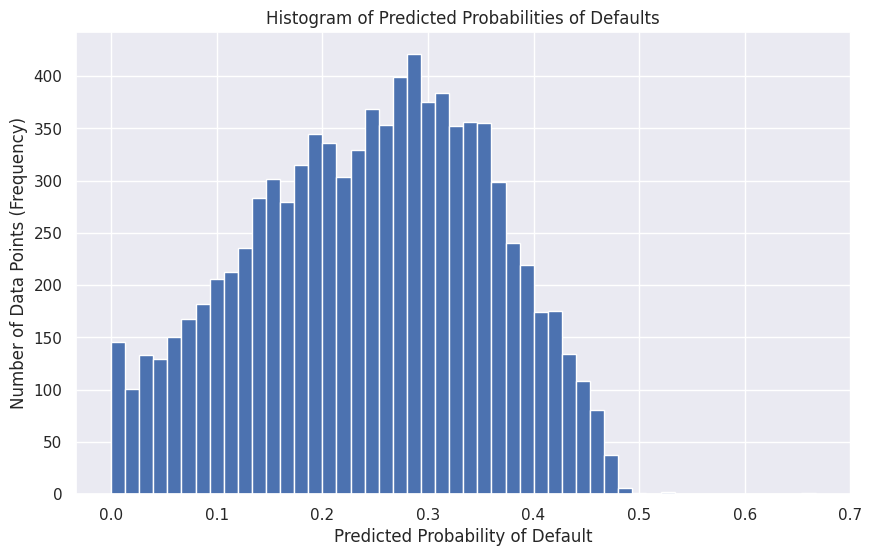

In [ ]:
# 3. Plot histogram of y_hat_probs
plt.figure(figsize=(10, 6))
plt.hist(y_hat_probs, bins=50)
plt.title('Histogram of Predicted Probabilities of Defaults')
plt.xlabel('Predicted Probability of Default')
plt.ylabel('Number of Data Points (Frequency)')
plt.show()

6.3 Analysis of Histogram

This histogram basically shows the prediction for what the datapoints will be, i.e. default or non-default. The x-axis is the chance it will be default (NOTE: multiple each decimal point to get the percentage). The y-axis is the number of data points in each specific "chance" (AKA predicted probability) range.

For example, 29-ish% has the most datapoints (i.e. the peak of histogram). In summary, the model is predicting that on average, there is roughly a 20-30% chance that it will default.

If we set the Threshold to 80%, the model will always predict non-default. 0.8 isn't even on the x-axis because none of our data points go up to that high. With a threshold of 0.8, our model has to be 80% sure that it will default for it to be classified as a default. The recall for defaults will be zero.



6.4 Generate Predicted Classification for 30% and 60% Thresholds

In [ ]:
# 4. Generate predictions for different thresholds
y_hat_30 = (y_hat_probs > 0.3).astype(int)
y_hat_60 = (y_hat_probs > 0.6).astype(int)

6.4 Which Threshold Should we use to Avoid too Many FN?

Based on Histogram above, to avoid too many FN's, we should probably use a threshold of 30%. a Threshold of 60% would still be a little too high.

6.5 Costruct a Data Frame Named df_predictions

In [ ]:
# 5. Construct dataframe with predictions
df_predictions = pd.DataFrame({
    'y_test': y_test,
    'y_hat': y_hat,
    'y_hat_probs': y_hat_probs,
    'y_hat_30': y_hat_30,
    'y_hat_60': y_hat_60
})

print(df_predictions.head())

       y_test  y_hat  y_hat_probs  y_hat_30  y_hat_60
28559       1      0     0.078756         0         0
14547       0      0     0.203487         0         0
7338        1      0     0.428332         1         0
23470       0      0     0.237853         0         0
1515        0      0     0.288397         0         0


# Step 7 - Borrow my_logistic_report()

In [ ]:
# Import the stuff from sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef


In [ ]:
# borrowing function from python notebook

def my_logistic_report(X_train, y_train, X_test, y_test, threshold=0.5, penalty=None, class_weight=None):
    logistic = LogisticRegression(class_weight=class_weight, penalty=penalty)
    logistic.fit(X_train, y_train)
    probs = logistic.predict_proba(X_test)[:,1]
    y_hat = np.where(probs >= threshold, 1, 0)

    cm = confusion_matrix(y_test, y_hat)
    accuracy = round(accuracy_score(y_test, y_hat), 2)
    precision = round(precision_score(y_test, y_hat), 2)
    recall = round(recall_score(y_test, y_hat), 2)
    f1score = round(f1_score(y_test, y_hat), 2)
    MCC = round(matthews_corrcoef(y_test, y_hat), 2)
    cm_labeled = pd.DataFrame(cm, index=['Actual: negative', 'Actual: positive'], columns=['Predict: negative', 'Predict: positive'])

    print("-----------------------------------------")
    print(f'Accuracy  = {accuracy}')
    print(f'Precision = {precision}')
    print(f'Recall    = {recall}')
    print(f'f1_score  = {f1score}')
    print(f'MCC       = {MCC}')
    print("-----------------------------------------")
    return cm_labeled

In [ ]:
# 7.1 Report for threshold = 0.5
print("Results for threshold = 0.5:")
cm_0_5 = my_logistic_report(X_train, y_train, X_test, y_test, threshold=0.5)
print(cm_0_5)
print("\n")

Results for threshold = 0.5:
-----------------------------------------
Accuracy  = 0.78
Precision = 0.0
Recall    = 0.0
f1_score  = 0.0
MCC       = -0.01
-----------------------------------------
                  Predict: negative  Predict: positive
Actual: negative               7008                  3
Actual: positive               1989                  0




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


7.1 Do we trust the accuracy of model? Why?

No because, in step 3, we already determined our data set is imbalanced. Accuracy will not show if the data set is leaning to one class compared to the other class. The model will look super accurate, but it is misleading. Also, all of our other performance metrics equal 0 and that is big red flag.  



In [ ]:
# 7.2 Report for threshold = 0.3
print("Results for threshold = 0.3:")
cm_0_3 = my_logistic_report(X_train, y_train, X_test, y_test, threshold=0.3)
print(cm_0_3)
print("\n")

Results for threshold = 0.3:
-----------------------------------------
Accuracy  = 0.66
Precision = 0.32
Recall    = 0.51
f1_score  = 0.39
MCC       = 0.18
-----------------------------------------
                  Predict: negative  Predict: positive
Actual: negative               4898               2113
Actual: positive                984               1005




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Calculate false negatives for both thresholds
fn_0_5 = cm_0_5.iloc[1, 0]
fn_0_3 = cm_0_3.iloc[1, 0]

print(f"False Negatives (threshold 0.5): {fn_0_5}")
print(f"False Negatives (threshold 0.3): {fn_0_3}")

False Negatives (threshold 0.5): 1989
False Negatives (threshold 0.3): 984


7.2

Our accuracy went down, but we now have metrics for Precision, Recall, f1_score, and MCC is not negative!! Our false negatives also went down.

This is consistent with our answer from 6.4. We said that a threshold of .30 would be best to avoid too many false negatives, and we were right.

# Step 8 - ROC & AUC

In [ ]:
# import the ROC and AUC from sklearn
from sklearn.metrics import roc_curve, auc

In [ ]:
# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_hat_probs)


In [ ]:
# Calculate the AUC
roc_auc = auc(fpr, tpr)

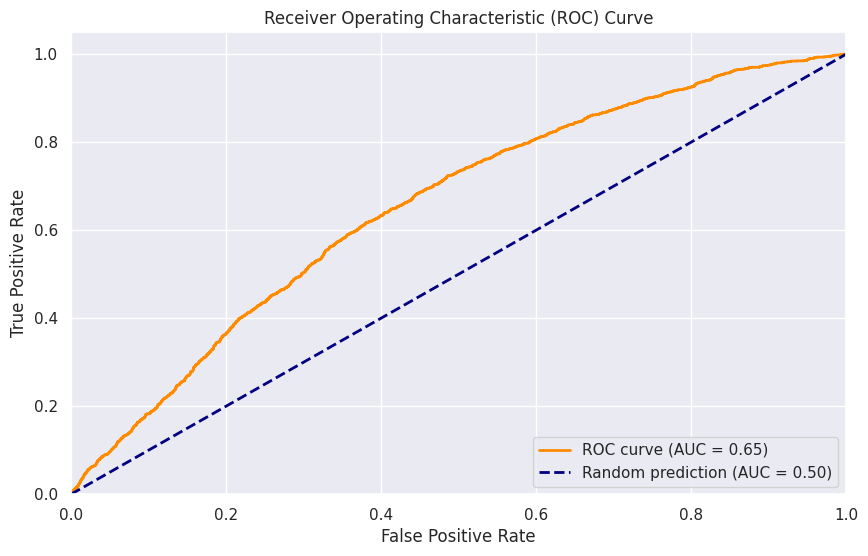

AUC Score: 0.6526


In [ ]:
# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random prediction (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC Score: {roc_auc:.4f}")

8 - Does our model do better job than no skill line?

Yes, it does 15% better than the no skill line.

# Step 9 - Estimate Accuracy with K-Fold CV

In [ ]:
#Import cross_val from sklearn
from sklearn.model_selection import cross_val_score

# Create another logistic regression model - Not sure if our logistic regression model from step 6 was altered/changed
model_step9 = LogisticRegression(random_state=1000)

In [ ]:
# Perform 5-fold cross validation
accuracy_CV5 = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Perform 10-fold cross validation
accuracy_CV10 = cross_val_score(model, X, y, cv=10, scoring='accuracy')

# Calculate mean accuracies
mean_accuracy_CV5 = np.mean(accuracy_CV5)
mean_accuracy_CV10 = np.mean(accuracy_CV10)

print(f"5-Fold CV Accuracy: {mean_accuracy_CV5:.5f}")
print(f"10-Fold CV Accuracy: {mean_accuracy_CV10:.5f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

5-Fold CV Accuracy: 0.77887
10-Fold CV Accuracy: 0.77880


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
